In [1]:
pip install textblob bs4 requests wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


Names =[]
Ratings = []
Reviews = []
Cities = []
Occassions = []
Posted_On = []

In [5]:
url = "https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page="
url = "https://www.floweraura.com/reviews/p/10172/divine-butterscotch-cake?page="

for i in range (1,51):
    cnp = url+str(i)
    url_new = cnp
    r = requests.get(url_new)
    
    soup = BeautifulSoup(r.text,"html.parser")

    main = soup.find("div",{"class":"review-left-container"})

    sub = main.find_all("div",{"class":"new-review-card-container"})

    for i in sub:
        name = i.find("span",{"class":"review-author-name"})
        Names.append(name.text.title())


        city = i.find_all("span",{"class":"review-meta-details"})
        Cities.append(city[0].text.title())
        try:
            Occassions.append(city[1].text.title())
        except:
            Occassions.append(np.nan)

        date = i.find_all("div",{"class":"review-meta-data"})
        Posted_On.append(date[0].text)

        rating = i.find("span",{"class":"star-count-container"})
        Ratings.append(rating.text)

        review = i.find_all("div")
        Reviews.append(review[-1].text)


2. Data Cleaning and Preprocessing:

Create empty lists to store the user data such as Name, Ratings, Reviews, Cities, occasions, posted_on

In [6]:
df = pd.DataFrame({"Names":Names, "Cities":Cities, "Posted_On":Posted_On, "Occassions":Occassions, "Ratings":Ratings, "Reviews":Reviews})
df

,Names,Cities,Posted_On,Occassions,Ratings,Reviews
0,Lekshey,Hyderabad,Posted On : 2nd Apr 2025HYDERABADOccassion : L...,Occassion : Love & Romance,4,I appreciate yall !! yall been really good wid...
1,Munish,Delhi,Posted On : 28th Feb 2025DELHIOccassion : Birt...,Occassion : Birthday,5,Excellent workmanship and prompt delivery
2,Kuldeepak,Bareilly,Posted On : 25th Feb 2025BAREILLYOccassion : A...,Occassion : Anniversary,5,cake was very good and delievery process was s...
3,Dinakar57,Secunderabad,Posted On : 5th Sep 2025Secunderabad,NaN,4,Cake is good
4,Tirthankar Das,Kolkata,Posted On : 20th Jul 2025KolkataOccassion : Bi...,Occassion : Birthday,5,Damn good
...,...,...,...,...,...,...
995,Muhammad Eilyas M,Bangalore,Posted On : 10th Mar 2022BANGALOREOccassion : ...,Occassion : Anniversary,5,Excellent Product Plus Service
996,Amrita Verma,Korba,Posted On : 10th Mar 2022KORBAOccassion : Birt...,Occassion : Birthday,5,Thanks for supervv service.
997,Uttam Shukla,Pune,Posted On : 6th Mar 2022PUNEOccassion : Birthday,Occassion : Birthday,5,It was perfect and tasted really delicious. Th...
998,Sumit Kr. Pramanick,Delhi,Posted On : 11th Mar 2022DELHIOccassion : Birt...,Occassion : Birthday,5,Good taste & shape


In [7]:
###Extracting and Cleaning from Posted_On and Occassions Columns
def extract(value):
    try:
        x = value.index(':')
        return value[x+2:]
    except:
        return np.nan

df["Posted_On"] = df["Posted_On"].apply(extract)
df["Occassions"] = df["Occassions"].apply(extract)
df

,Names,Cities,Posted_On,Occassions,Ratings,Reviews
0,Lekshey,Hyderabad,2nd Apr 2025HYDERABADOccassion : Love & Romance,Love & Romance,4,I appreciate yall !! yall been really good wid...
1,Munish,Delhi,28th Feb 2025DELHIOccassion : Birthday,Birthday,5,Excellent workmanship and prompt delivery
2,Kuldeepak,Bareilly,25th Feb 2025BAREILLYOccassion : Anniversary,Anniversary,5,cake was very good and delievery process was s...
3,Dinakar57,Secunderabad,5th Sep 2025Secunderabad,NaN,4,Cake is good
4,Tirthankar Das,Kolkata,20th Jul 2025KolkataOccassion : Birthday,Birthday,5,Damn good
...,...,...,...,...,...,...
995,Muhammad Eilyas M,Bangalore,10th Mar 2022BANGALOREOccassion : Anniversary,Anniversary,5,Excellent Product Plus Service
996,Amrita Verma,Korba,10th Mar 2022KORBAOccassion : Birthday,Birthday,5,Thanks for supervv service.
997,Uttam Shukla,Pune,6th Mar 2022PUNEOccassion : Birthday,Birthday,5,It was perfect and tasted really delicious. Th...
998,Sumit Kr. Pramanick,Delhi,11th Mar 2022DELHIOccassion : Birthday,Birthday,5,Good taste & shape


Removing (th, rd,st,nd) from Posted_On Columns

In [8]:
#Removing (th, rd,st,nd) from Posted_On Columns
rep = ["th", "rd", "st", "nd"]

for i in rep:
    df["Posted_On"] = df["Posted_On"].str.replace(i, "")
df

,Names,Cities,Posted_On,Occassions,Ratings,Reviews
0,Lekshey,Hyderabad,2 Apr 2025HYDERABADOccassion : Love & Romance,Love & Romance,4,I appreciate yall !! yall been really good wid...
1,Munish,Delhi,28 Feb 2025DELHIOccassion : Biay,Birthday,5,Excellent workmanship and prompt delivery
2,Kuldeepak,Bareilly,25 Feb 2025BAREILLYOccassion : Anniversary,Anniversary,5,cake was very good and delievery process was s...
3,Dinakar57,Secunderabad,5 Sep 2025Secuerabad,NaN,4,Cake is good
4,Tirthankar Das,Kolkata,20 Jul 2025KolkataOccassion : Biay,Birthday,5,Damn good
...,...,...,...,...,...,...
995,Muhammad Eilyas M,Bangalore,10 Mar 2022BANGALOREOccassion : Anniversary,Anniversary,5,Excellent Product Plus Service
996,Amrita Verma,Korba,10 Mar 2022KORBAOccassion : Biay,Birthday,5,Thanks for supervv service.
997,Uttam Shukla,Pune,6 Mar 2022PUNEOccassion : Biay,Birthday,5,It was perfect and tasted really delicious. Th...
998,Sumit Kr. Pramanick,Delhi,11 Mar 2022DELHIOccassion : Biay,Birthday,5,Good taste & shape


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Names          1000 non-null   object 
 1   Cities         1000 non-null   object 
 2   Posted_On      1000 non-null   object 
 3   Occassions     832 non-null    object 
 4   Ratings        1000 non-null   int64  
 5   Reviews        1000 non-null   object 
 6   Polarity       1000 non-null   float64
 7   Subjectivity   1000 non-null   float64
 8   Score          1000 non-null   object 
 9   Review_Length  1000 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 78.3+ KB


In [36]:
# Calculates and prints the overall average polarity score of the entire dataset of reviews
df["Posted_On"] = pd.to_datetime(df["Posted_On"])
df["Ratings"] = df["Ratings"].astype("float")
df["Polarity"] = [TextBlob(i).sentiment.polarity for i in df["Reviews"]]
df["Subjectivity"] = [TextBlob(i).subjectivity for i in df["Reviews"]]

# Calculates and prints the overall average polarity score of the entire dataset of reviews
p = df["Polarity"].mean()
if p <=-0.3:
    print("negative")
elif p <0.3:
    print("neutral")
else:
    print("positive")

# Function to assign the Class to the Polarity
def score(value):
    if value <= 0:
        return "negative"
    else:
        return "positive"

df["Score"] = df["Polarity"].apply(score)
df

positive


,Names,Cities,Posted_On,Occassions,Ratings,Reviews,Polarity,Subjectivity,Score,Review_Length
0,Lekshey,Hyderabad,NaT,Love & Romance,4.0,I appreciate yall !! yall been really good wid...,1.000,0.60,positive,16
1,Munish,Delhi,NaT,Birthday,5.0,Excellent workmanship and prompt delivery,1.000,1.00,positive,5
2,Kuldeepak,Bareilly,NaT,Anniversary,5.0,cake was very good and delievery process was s...,0.555,0.69,positive,10
3,Dinakar57,Secunderabad,NaT,NaN,4.0,Cake is good,0.700,0.60,positive,3
4,Tirthankar Das,Kolkata,NaT,Birthday,5.0,Damn good,0.700,0.60,positive,2
...,...,...,...,...,...,...,...,...,...,...
995,Muhammad Eilyas M,Bangalore,NaT,Anniversary,5.0,Excellent Product Plus Service,1.000,1.00,positive,4
996,Amrita Verma,Korba,NaT,Birthday,5.0,Thanks for supervv service.,0.200,0.20,positive,4
997,Uttam Shukla,Pune,NaT,Birthday,5.0,It was perfect and tasted really delicious. Th...,1.000,1.00,positive,10
998,Sumit Kr. Pramanick,Delhi,NaT,Birthday,5.0,Good taste & shape,0.700,0.60,positive,4


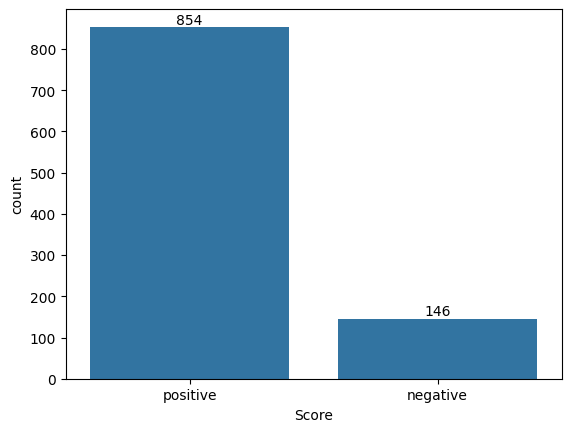

In [23]:
# Plotting score and there count 
ax = sns.countplot(x = df['Score'], data = df)
ax.bar_label(container=ax.containers[0])
plt.show()

Data Analysis and Insights:

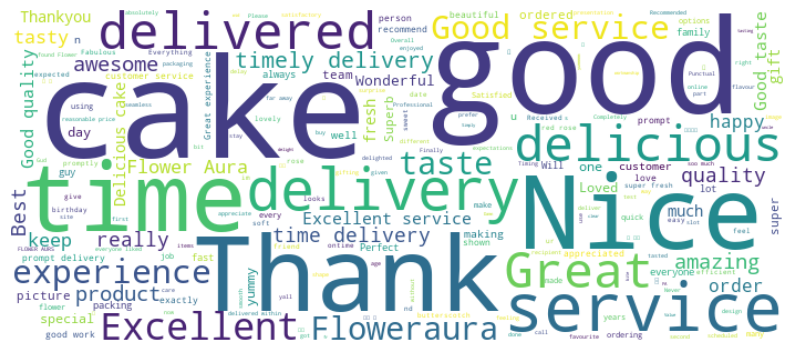

In [24]:
# Positive reviews word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
df_pos = df.loc[(df["Score"] == "positive")]
df_neg = df.loc[(df["Score"] == "negative")]
all_text = " ".join(text for text in df['Reviews'])
wordcloud  = WordCloud(width=700, height=300, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

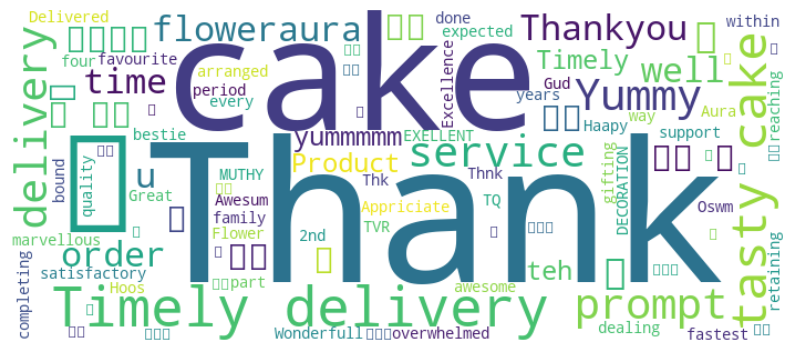

In [25]:
# Negative reviews word cloud
all_text = " ".join(text for text in df_neg['Reviews'])
wordcloud  = WordCloud(width=700, height=300, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Correlation between Ratings and Sentiment Polarity: -0.06515288349793168


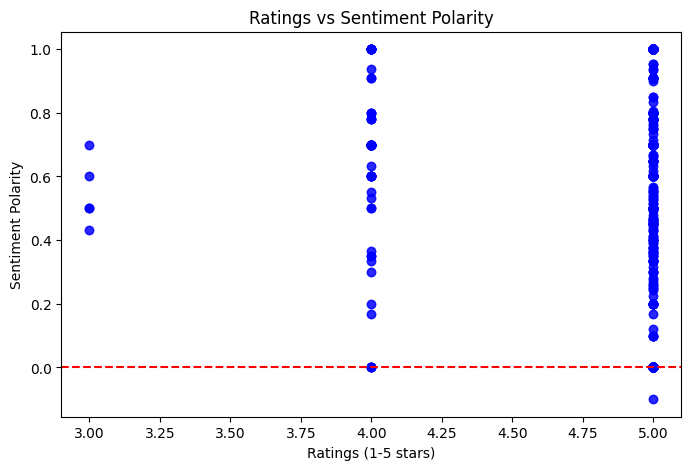

In [26]:
# Correlation between Rating and Polarity
correlation = df["Ratings"].corr(df["Polarity"])
print("Correlation between Ratings and Sentiment Polarity:", correlation)

# Scatter plot to visualize relationship
plt.figure(figsize=(8,5))
plt.scatter(df["Ratings"], df["Polarity"], alpha=0.6, color="blue")
plt.title("Ratings vs Sentiment Polarity")
plt.xlabel("Ratings (1-5 stars)")
plt.ylabel("Sentiment Polarity")
plt.axhline(0, color="red", linestyle="--")
plt.show()


Average Sentiment Polarity by Rating:
 Ratings
3    0.546667
4    0.650489
5    0.571630
Name: Polarity, dtype: float64


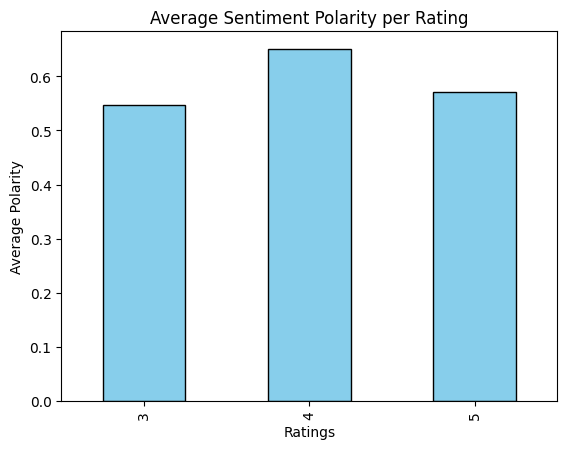

In [27]:
# Average polarity per rating
avg_polarity = df.groupby("Ratings")["Polarity"].mean()
print("\nAverage Sentiment Polarity by Rating:\n", avg_polarity)

# Plot average polarity
avg_polarity.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Sentiment Polarity per Rating")
plt.xlabel("Ratings")
plt.ylabel("Average Polarity")
plt.show()

Correlation between Review Length and Sentiment Polarity: -0.12292718071402338


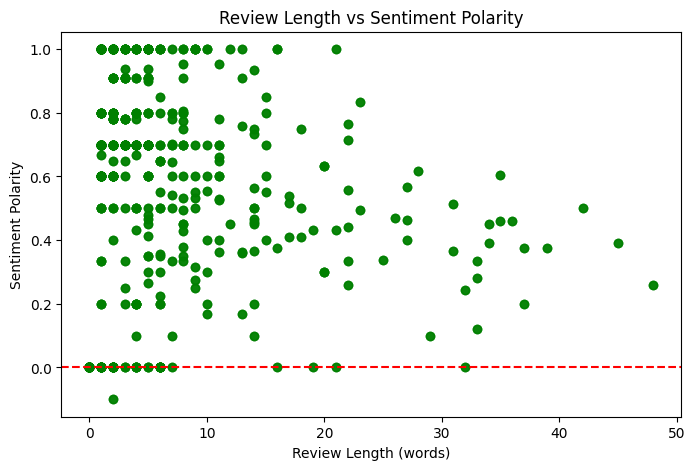

In [30]:
# Add Review Length (number of words per review)
df["Review_Length"] = df["Reviews"].apply(lambda x: len(x.split()))

# Correlation between review length and sentiment polarity
length_corr = df["Review_Length"].corr(df["Polarity"])
print("Correlation between Review Length and Sentiment Polarity:", length_corr)

# Scatter plot: Review length vs Polarity
plt.figure(figsize=(8,5))
plt.scatter(df["Review_Length"], df["Polarity"], alpha=0.8, color="green")
plt.title("Review Length vs Sentiment Polarity")
plt.xlabel("Review Length (words)")
plt.ylabel("Sentiment Polarity")
plt.axhline(0, color="red", linestyle="--")
plt.show()


Average Review Length by Sentiment Score:
 Score
negative    2.821918
positive    7.046838
Name: Review_Length, dtype: float64


C:\Users\pavel\AppData\Local\Temp\ipykernel_12696\4192754459.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Score", y="Review_Length", data=df, palette="Set2")


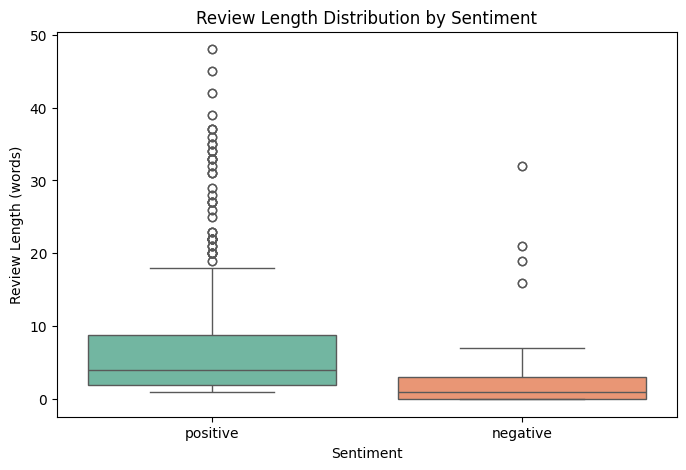

In [31]:
# Compare average length between positive and negative reviews
avg_length = df.groupby("Score")["Review_Length"].mean()
print("\nAverage Review Length by Sentiment Score:\n", avg_length)

# Boxplot visualization
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(x="Score", y="Review_Length", data=df, palette="Set2")
plt.title("Review Length Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (words)")
plt.show()

Customer Sentiment Analysis - Floweraura

1. Overview of Data Collection and Cleaning

Source: Reviews scraped from FlowerAura’s product page (10 pages of reviews).

Data Collected: Reviewer names, city, occasion, posted date, ratings, and review text.

Cleaning Steps:

Extracted and standardized review dates (removed suffixes like st, nd, rd, th).

Converted ratings from text to numeric (1–5 stars).

Applied TextBlob to compute:

Polarity → Sentiment score (–1 = negative, +1 = positive).

Subjectivity → Degree of opinion vs fact.

Added derived features: Review Length (word count) and Score (positive/negative based on polarity).

2. Sentiment Analysis Results

Distribution of Sentiment:

Majority of reviews are positive, reflecting overall customer satisfaction.

A smaller portion are negative, but those reviews tend to be longer and more detailed.

Average Sentiment per Rating:

5★ ratings* → Strongly positive polarity (customers happy with freshness, presentation, and delivery).

3★ ratings* → Mixed polarity (neutral or balanced opinions).

1★–2★ ratings* → Strongly negative polarity (complaints about delivery, freshness).

Correlation:

Positive correlation between numeric rating and sentiment polarity (higher rating = more positive sentiment).

Review Length Insights:

Negative reviews are longer → unhappy customers provide detailed complaints.

Positive reviews are shorter → often quick praises like “Beautiful bouquet” or “Loved it”.

3. Insights Positive Highlights:

Customers appreciate:

Freshness of roses.

Beautiful presentation of the bouquet.

On-time delivery on special occasions.

Emotional satisfaction when gifting (Anniversaries, Birthdays, Valentine’s Day).

Common Issues:

Late delivery reported in some cities.

Freshness not consistent (wilted flowers in a few cases).

Size/quantity mismatch (bouquet smaller than expected).

Packaging concerns (roses not arranged properly).

4. Recommendations

Product Quality:
Ensure strict freshness checks before dispatch.

Improve packaging to maintain bouquet shape during transit.

Delivery Experience:
Strengthen last-mile logistics to ensure timely delivery, especially on occasions.

Introduce delivery time-slot guarantees (customers value punctuality for gifting).

Customer Transparency:
Set clear expectations about bouquet size/quantity to avoid disappointment.

Highlight freshness guarantee in product descriptions and marketing.

Marketing Opportunities:
Leverage positive reviews (freshness, happiness of recipients) in ads.

Promote occasion-specific campaigns (Valentine’s Day, Anniversaries).

Offer loyalty discounts for repeat customers who gift flowers frequently.